In [22]:
import numpy as np
import pandas as pd
df = pd.read_csv('npadata.csv')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
pd.options.display.max_rows = 999
#df1 = just country, requirements, duration
df1 = df[['country', 'requirements', 'degree', 'duration']]

#d1 is the full dataset with the missing rows removed
d1 = df[(df.duration.isnull()==False) & (df.requirements.isnull()==False) & (df.degree.isnull()==False)].sort_values('country')


In [2]:
pd.options.display.max_rows = 999

# First, let's have a look at the data
Here we have it sorted by country

It appears there are 127 possible separate programs

# How many have blanks in the core categories of requirements, duration, or degree?

These are the entries with something missing:

In [3]:
missing = df1[(df.duration.isnull()==True) | (df['requirements'].isnull()==True) | (df['degree'].isnull()==True)].sort_values('country')
missing

,country,requirements,degree,duration
93,Angola,Medical school,physician specialist,NaN
95,Benin,Medical school,physician specialist,NaN
96,Benin,Medical school,physician specialist,NaN
80,Burundi,NaN,Licence,NaN
110,Chad,NaN,NaN,NaN
8,Ethiopia,NaN,Bachelor's degree,NaN
9,Ethiopia,NaN,Bachelor's degree,NaN
102,Ethiopia,Medical school,physician specialist,NaN
10,Gambia,Nursing diploma,Bachelor's degree,NaN
111,Ghana,NaN,NaN,NaN


In [4]:
missingnum = missing['country'].count()
print('There are ', missingnum, 'rows with missing core elements')

There are  28 rows with missing core elements


# Therefore, there are 28 entries with missing elements
### Let's drop them from the database, the new database is df2

In [5]:
df2 = df1[(df.duration.isnull()==False) & (df.requirements.isnull()==False) & (df.degree.isnull()==False)].sort_values('country')
print('There are', df2.country.nunique(), 'unique countries in the dataset')

There are 34 unique countries in the dataset


In [6]:
df.sort_values('country')

,Source,Order,country,requirements,duration,degree,curriculum_physicians,trainee-supervisor,npagrads,npaprograms,...,"Maintaining general anaesthesia with volatiles (ether, halothane, isoflurane, etc)",Maintaining anaesthesia with ketamine,Insertion of arterial cannulas,"Insertion of central venous access (internal jugular, femoral, subclavian)",Video laryngoscopy,Fiberoptic intubation,Managing mechanical ventilation,Teaching anaesthesia trainees in theatre,Triage of critically ill patients,Communicating directly with patients' families
94,redcap2018,127,Angola,Medical school,48.0,physician specialist,NaN,2.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,redcap2018,113,Angola,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,redcap2018,106,Angola,Nursing diploma,36.0,Diploma,1-50%,2.000000,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,redcap2018,111,Benin,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,SSA,1,Benin,Nursing diploma,36.0,Master's degree,>50%,NaN,20.0,1.0,...,"Yes, trained to perform independently","Yes, trained to perform independently",Not trained to perform,Not trained to perform,Not trained to perform,Not trained to perform,"Yes, trained to perform independently",Trained to perform under direct supervision,NaN,"Yes, trained to perform independently"
87,redcap2018,86,Benin,Nursing diploma,24.0,Master's degree,>50%,2.000000,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,redcap2018,87,Benin,Nursing diploma,24.0,Master's degree,>50%,2.000000,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,AAAC,79,Benin,Diploma,72.0,Diploma,>50%,5.000000,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,redcap2018,112,Benin,Medical school,NaN,physician specialist,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,SSA,2,Botswana,Nursing degree,12.0,Diploma,>50%,NaN,8.0,1.0,...,"Yes, trained to perform independently","Yes, trained to perform independently",Not trained to perform,Not trained to perform,I am not sure,I am not sure,"Yes, trained to perform independently",I am not sure,NaN,I am not sure


### There are 34 countries represented in the final dataset:

In [7]:
df2.country.value_counts()

Uganda                      9
Ethiopia                    7
Burkina Faso                5
Nigeria                     5
Tanzania                    5
Niger                       4
Somaliland                  4
Sierra Leone                4
Kenya                       4
DRC                         4
Benin                       4
Malawi                      4
Gabon                       3
Ghana                       3
Rwanda                      3
Zimbabwe                    3
Cote D'Ivoire               3
Togo                        2
Cameroon                    2
Liberia                     2
Burundi                     2
Mozambique                  2
Zambia                      2
Senegal                     2
Angola                      2
Swaziland                   1
Botswana                    1
South Africa                1
Madagascar                  1
Sudan                       1
Central African Republic    1
Congo (Brazzaville)         1
South Sudan                 1
Eritrea   

# <u> Unique programs</u>
### Any degree that has two different durations means we have a duplicate response, and we'll need to sort out which one we trust.
For example, in Benin, the data suggests that you can enter with a nursing diploma, and get a master's degree, with two different program durations.

In [8]:
df2.groupby(['country', 'requirements','degree','duration']).count()

Empty DataFrame
Columns: []
Index: [(Angola, Medical school, physician specialist, 48.0), (Angola, Nursing diploma, Diploma, 36.0), (Benin, Diploma, Diploma, 72.0), (Benin, Nursing diploma, Master's degree, 24.0), (Benin, Nursing diploma, Master's degree, 36.0), (Botswana, Nursing degree, Diploma, 12.0), (Burkina Faso, Medical school, physician specialist, 48.0), (Burkina Faso, Nursing degree, Diploma, 24.0), (Burkina Faso, Nursing diploma, Diploma, 24.0), (Burundi, Nursing diploma, Diploma, 36.0), (Burundi, Secondary school, Bachelor's degree, 48.0), (Cameroon, Nursing degree, Diploma, 24.0), (Cameroon, Nursing diploma, Diploma, 24.0), (Central African Republic, Nursing diploma, Master's degree, 24.0), (Congo (Brazzaville), Nursing diploma, Assistant sanitaire en anesthésie-réanimation, 24.0), (Cote D'Ivoire, Medical school, physician specialist, 48.0), (Cote D'Ivoire, Nursing diploma, Diploma, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 36.0), (DRC, Medical school, physician specialist, 60.0), (DRC, Nursing diploma, Diploma, 36.0), (DRC, Other, Autre, 9.0), (Eritrea, Nursing diploma, Diploma, 36.0), (Ethiopia, Bachelor's degree, Master's degree, 24.0), (Ethiopia, Medical school, physician specialist, 36.0), (Ethiopia, Nursing diploma, Bachelor's degree, 48.0), (Ethiopia, Nursing diploma, Certificate, 12.0), (Ethiopia, Secondary school, Bachelor's degree, 48.0), (Gabon, Medical school, physician specialist, 48.0), (Gabon, Nursing degree, Certificate, 36.0), (Gabon, Nursing diploma, Master's degree, 36.0), (Ghana, Advanced diploma anesthesia, Bachelor's degree, 24.0), (Ghana, Nursing degree, Bachelor's degree, 24.0), (Ghana, Nursing diploma, Diploma, 24.0), (Kenya, Diploma in clinical medicine, Diploma, 18.0), (Kenya, Nursing degree, I don't know, 24.0), (Kenya, Nursing diploma, Diploma, 18.0), (Liberia, Nursing diploma, Diploma, 24.0), (Liberia, Other, Diploma, 24.0), (Madagascar, Secondary school, Bachelor's degree, 36.0), (Malawi, Medical school, physician specialist, 48.0), (Malawi, Nursing diploma, Diploma, 18.0), (Malawi, Other, Diploma, 36.0), (Mozambique, Medical school, physician specialist, 48.0), (Mozambique, Nursing diploma, Bachelor's degree, 24.0), (Niger, Nursing diploma, Licence, 36.0), (Nigeria, Nursing degree, Certificate, 18.0), (Nigeria, Nursing degree, Diploma, 18.0), (Nigeria, Nursing diploma, Certificate, 24.0), (Nigeria, Nursing diploma, Diploma, 18.0), (Rwanda, Medical school, physician specialist, 48.0), (Rwanda, Nursing diploma, Bachelor's degree, 48.0), (Rwanda, Secondary school, Bachelor's degree, 48.0), (Senegal, Medical school, physician specialist, 48.0), (Senegal, Nursing diploma, Diploma, 24.0), (Sierra Leone, Diploma, Diploma, 18.0), (Sierra Leone, Nursing degree, Diploma, 18.0), (Sierra Leone, Nursing diploma, Diploma, 18.0), (Sierra Leone, nursing certificate, State enrolled community health nurse SECHN,, Certificate, 12.0), (Somaliland, Nursing degree, Bachelor's degree, 18.0), (Somaliland, Nursing degree, Bachelor's degree, 24.0), (Somaliland, Nursing diploma, Bachelor's degree, 2.0), (Somaliland, Previously qualified nurse, midwife or pharmacist, Nurse anesthetist', 18.0), (South Africa, Medical school, Diploma, 6.0), (South Sudan, Nursing diploma, Diploma, 24.0), (Sudan, Secondary school, Bachelor's degree, 48.0), (Swaziland, Nursing degree, Bachelor's degree, 24.0), (Tanzania, Assisstant medical officer (general), Diploma, 24.0), (Tanzania, Nursing degree, Certificate, 12.0), (Tanzania, Nursing diploma, Certificate, 12.0), (Tanzania, Nursing diploma, Diploma, 24.0), (Togo, Nursing diploma, Master's degree, 24.0), (Togo, Secondary school, I don't know, 36.0), (Uganda, Medical school, physician specialist, 36.0), (Uganda, Nursing diploma, Certificate, 18.0), (Uganda, Nursing diploma, Diploma, 2.5), (Uganda, Nursing diploma, Diploma, 24.0), (Uganda, Nursing diploma, Diploma, 36.0), (Uganda, Other, Diploma, 24.0), (Uganda, diploma in nursing, midwifery or clinical medicine, Advanced D

## Here's the same thing again, but easier to identify:
### In the 'duration' column, anything >1 means we have to sort out which program we believe to exist.
It is unlikely that two programs have the same entry requirements, and give the same degree, but have two <i>different</i> durations, right?

In [9]:
uniqueprogs = df2.groupby(['country', 'requirements','degree']).nunique()
uniqueprogs

country  \
country                  requirements                                       degree                                                   
Angola                   Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
Benin                    Diploma                                            Diploma                                              1   
                         Nursing diploma                                    Master's degree                                      1   
Botswana                 Nursing degree                                     Diploma                                              1   
Burkina Faso             Medical school                                     physician specialist                                 1   
                         Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Burundi                  Nursing diploma                                    Diploma                                              1   
                         Secondary school                                   Bachelor's degree                                    1   
Cameroon                 Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Central African Republic Nursing diploma                                    Master's degree                                      1   
Congo (Brazzaville)      Nursing diploma                                    Assistant sanitaire en anesthésie-réanimation        1   
Cote D'Ivoire            Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
DRC                      Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Diploma                                              1   
                         Other                                              Autre                                                1   
Eritrea                  Nursing diploma                                    Diploma                                              1   
Ethiopia                 Bachelor's degree                                  Master's degree                                      1   
                         Medical school                                     physician specialist                                 1   
                         Nursing diploma                                    Bachelor's degree                                    1   
                                                                            Certificate                                          1   
                         Secondary school                                   Bachelor's degree                                    1   
Gabon                    Medical school                                     physician specialist                                 1   
                         Nursing degree                                     Certificate                                          1   
                         Nursing diploma                                    Master's degree                                      1   
Ghana                    Advanced diploma anesthesia                        Bachelor's degree          

## here is the same thing, except with a total at the bottom. As you can see, there are 79 unique pathways (requirement/degree pairs), but 84 durations... so 10 duplicates we still have to sort out

In [10]:
uniqueprogs.loc['total'] = uniqueprogs.sum()
uniqueprogs

,country,requirements,degree,duration
"(Angola, Medical school, physician specialist)",1,1,1,1
"(Angola, Nursing diploma, Diploma)",1,1,1,1
"(Benin, Diploma, Diploma)",1,1,1,1
"(Benin, Nursing diploma, Master's degree)",1,1,1,2
"(Botswana, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Medical school, physician specialist)",1,1,1,1
"(Burkina Faso, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Secondary school, Bachelor's degree)",1,1,1,1


# How many NPA programs are in each country?
### response to survey question 'How many NPA programs are in your country?' We didn't ask this in the follow up surveys, I'm inclined to leave it out (especially because it conflicts with itself).

<br>Each represents one survey response... for insance in Burundi, 1 person said there is 1 training program, and 2 people said there were 3 training programs. 

In [11]:
npapgms = df[['country', 'npaprograms']]
pd.crosstab(npapgms['country'], npapgms['npaprograms'])

npaprograms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,17.0,19.0,31.0,500.0
country,,,,,,,,,,,,,,
Angola,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Benin,0,4,0,0,0,0,0,0,0,0,0,0,0,0
Botswana,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Burkina Faso,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Burundi,0,1,0,2,0,0,0,0,0,0,0,0,0,0
Cameroon,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Congo (Brazzaville),0,1,0,0,0,0,0,0,0,0,0,0,0,0
Cote D'Ivoire,0,2,0,0,0,0,0,0,0,0,0,0,0,0
DRC,0,1,1,0,0,0,0,0,0,0,0,0,0,0


# <u> Entry requirements </u>

### It appears that, by far, most programs are nursing diploma entry. From quick googling, even a nursing diploma is often 3 years long.

In [12]:
reqs = df2.requirements.value_counts()
reqspct = df2.requirements.value_counts(normalize=True)

In [13]:
reqstab = pd.concat([reqs, reqspct], axis=1)
reqstab

,requirements,requirements
Nursing diploma,46,0.464646
Nursing degree,15,0.151515
Medical school,14,0.141414
Secondary school,9,0.090909
Other,5,0.050505
Diploma,2,0.020202
"nursing certificate, State enrolled community health nurse SECHN,",1,0.010101
Diploma in clinical medicine,1,0.010101
"Previously qualified nurse, midwife or pharmacist",1,0.010101
"diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia",1,0.010101


In [14]:
reqs.plot.bar(title='Frequency of entry requirements')

# <u> Degrees awarded </u>
### Again, it appears that diplomas are far more likely to be awarded.

In [15]:
degs = df2['degree'].value_counts()
degspct = df2['degree'].value_counts(normalize=True)
degstab = pd.concat([degs, degspct], axis=1)
degstab.columns = ('count', 'percent')
degstab

,count,percent
Diploma,43,0.434343
Bachelor's degree,17,0.171717
physician specialist,13,0.131313
Certificate,9,0.090909
Master's degree,7,0.070707
Licence,4,0.040404
I don't know,2,0.020202
Assistant sanitaire en anesthésie-réanimation,1,0.010101
Advanced Diploma,1,0.010101
Nurse anesthetist',1,0.010101


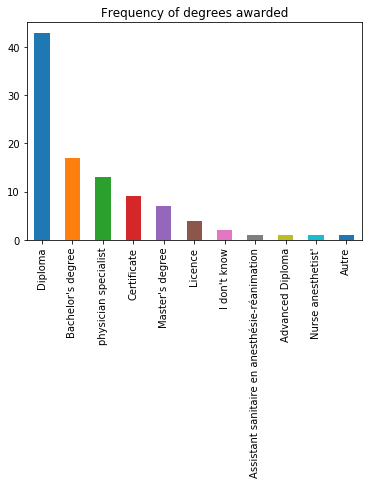

In [16]:
degs.plot.bar(title="Frequency of degrees awarded")

# Survey question: "Is there an association that sets practice guidelines in your country?"

In [36]:
guideline = pd.crosstab(d1['country'],d1['practice-guideline-org'])
guideline.loc['total'] = guideline.sum()
guideline

practice-guideline-org,I don't know,No,Yes
country,,,
Angola,0,1,0
Benin,0,0,3
Burkina Faso,0,1,0
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0
Ethiopia,0,0,3


In [ ]:
pd.crosstab(d1['country'],d1['practice-guideline-org'])


# Survey question: "Is there a standardized exam that must be taken before they can practice?"

In [30]:
pd.crosstab(d1['country'], d1['practice-guideline-org'])

practice-guideline-org,I don't know,No,Yes
country,,,
Angola,0,1,0
Benin,0,0,3
Burkina Faso,0,1,0
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0
Ethiopia,0,0,3
